In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np

### AUC 

In [2]:
filelist = ['./ml_output/LRS_mhot_5fold_l0.001_auc_ver4.npy',
           './ml_output/LRSN_mhot_5fold_l0.001_auc_ver3.npy',
           './ml_output/MLP_mhot_5fold_l0.0001_auc_ver0.npy',
           './ml_output/MLPN_mhot_5fold_l0.0001_auc_ver0.npy']
mean_set = []
se_set = []
for file in filelist:
    test_AUC = np.load(file)
    mean = round(np.mean(test_AUC),3)
    se = round(np.std(test_AUC, ddof=1) / np.sqrt(np.size(test_AUC)),3)
    mean_set.append(mean)
    se_set.append(se)

print(mean_set)
print(se_set)

[0.957, 0.954, 0.967, 0.964]
[0.014, 0.015, 0.019, 0.019]


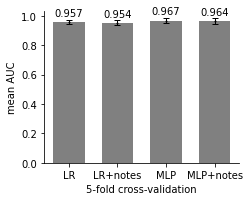

In [3]:
methods = ['LR','LR+notes','MLP','MLP+notes']

f = plt.figure(figsize=(3.5, 2.8))
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.errorbar( methods,mean_set, yerr=se_set, fmt='o', color='Black', elinewidth=1,capthick=1,errorevery=1, alpha=1, ms=1, capsize = 3)
bar = plt.bar(methods, mean_set,tick_label = methods, color='Grey', width=0.65)##Bar plot
plt.xlabel('5-fold cross-validation') ## Label on X axis
plt.ylabel('mean AUC') ##Label on Y axis
for i, rectangle in enumerate(bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+se_set[i] + 0.01,mean_set[i],ha='center', va='bottom')    
f.savefig("./5fold_AUC_all.pdf", bbox_inches='tight')

### ROC

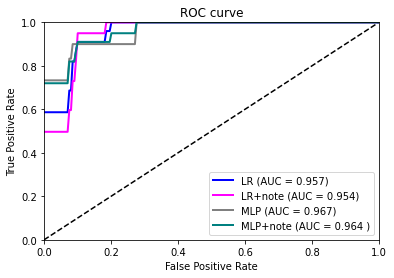

In [12]:
tpr_LRS = np.load('./ml_output/LRS_mhot_5fold_l0.001_tpr_ver4.npy')
auc_LRS = np.load('./ml_output/LRS_mhot_5fold_l0.001_auc_ver4.npy')
mean_tpr_LRS = np.mean(tpr_LRS, axis=0)
mean_auc_LRS = np.mean(auc_LRS, axis=0)
tpr_LRSN = np.load('./ml_output/LRSN_mhot_5fold_l0.001_tpr_ver3.npy')
auc_LRSN = np.load('./ml_output/LRSN_mhot_5fold_l0.001_auc_ver3.npy')
mean_tpr_LRSN = np.mean(tpr_LRSN, axis=0)
mean_auc_LRSN = np.mean(auc_LRSN, axis=0)
tpr_MLP = np.load('./ml_output/MLP_mhot_5fold_l0.0001_tpr_ver0.npy')
auc_MLP = np.load('./ml_output/MLP_mhot_5fold_l0.0001_auc_ver0.npy')
mean_tpr_MLP = np.mean(tpr_MLP, axis=0)
mean_auc_MLP = np.mean(auc_MLP, axis=0)
tpr_MLPN = np.load('./ml_output/MLPN_mhot_5fold_l0.0001_tpr_ver0.npy')
auc_MLPN = np.load('./ml_output/MLPN_mhot_5fold_l0.0001_auc_ver0.npy')
mean_tpr_MLPN = np.mean(tpr_MLPN, axis=0)
mean_auc_MLPN = np.mean(auc_MLPN, axis=0)
mean_fpr = np.linspace(0,1,200)

f = plt.figure(figsize=(6, 4))  

plt.figure(1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(mean_fpr, mean_tpr_LRS, color='blue',label=r'LR (AUC = %0.3f)' % (mean_auc_LRS),lw=2, alpha=1)
plt.plot(mean_fpr, mean_tpr_LRSN, color='Magenta',label=r'LR+note (AUC = %0.3f)' % (mean_auc_LRSN),lw=2, alpha=1)
plt.plot(mean_fpr, mean_tpr_MLP, color='gray',label=r'MLP (AUC = %0.3f)' % (mean_auc_MLP),lw=2, alpha=1)
plt.plot(mean_fpr, mean_tpr_MLPN, color='Teal',label=r'MLP+note (AUC = %0.3f )' % (mean_auc_MLPN),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()
f.savefig("./ROC_all.pdf", bbox_inches='tight')